In [1]:
import numpy as np 
import pandas as pd 
import xarray as xr 
import scipy.fft as fft 
import matplotlib.pyplot as plt 

In [3]:
# # input global raw data
# # output global filtered data

# # read raw global daily data 1978-2022
# dirn = '/pscratch/sd/l/linyaoly/ERA5/reanalysis/'
# flg = 'u200'
# varn = 'u'
# ds1 = xr.open_mfdataset(dirn+flg+'_2deg*.nc',combine='nested',concat_dim="time")

# ds1=ds1.rename({varn:flg,"longitude":"lon","latitude":"lat"})

# ds1=ds1.resample(time="1D").mean('time')
varn = 'olr'
ds1 = xr.open_dataset("/global/homes/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".day.1978to2022.nc")
ds1 

<xarray.Dataset>
Dimensions:  (time: 16222, lon: 180, lat: 91)
Coordinates:
  * time     (time) datetime64[ns] 1978-01-01 1978-01-02 ... 2022-05-31
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
Data variables:
    olr      (time, lat, lon) float32 ...

In [99]:
# remove 120-day running averages
varn = 'olr'
ds1 = xr.open_dataset("/global/homes/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".day.1978to2022.nc")

ds1 = ds1.sel(time=slice('1978-09-03', '2019-12-31'), lat=slice(15,-15))
fltu = ds1[varn].rolling(time=120, center=False).mean()
ds1 = ds1.sel(time=slice('1979-01-01', '2019-12-31'))
ds1[varn] = ds1[varn] - fltu[119:-1,:,:].values
ds1[varn] = - ds1[varn] / 3600
print(ds1[varn].min())
print(ds1[varn].max())

# remove first 3 Fourier harmonics
ds2 = ds1.groupby("time.dayofyear").mean()
climvarn = ds2[varn].values
climvarnfft = fft.rfftn(climvarn, axes=0)
climvarnfft[3:,:,:] = 0.0
smclimvarn = fft.irfftn(climvarnfft, axes=0)
ds2[varn].values = smclimvarn
smclimvarn[0:5,7,0]
x = ds1[varn].groupby("time.dayofyear") - ds2[varn]
ds1[varn].values = x.values


<xarray.DataArray 'olr' ()>
array(-220.60388184)
<xarray.DataArray 'olr' ()>
array(133.25784302)


In [6]:
# calculate anomalies of a given field 

import numpy as np 
import pandas as pd 
import xarray as xr 
import scipy.fft as fft 
import matplotlib.pyplot as plt 

# remove 120-day running averages
varn = 'olr'
latsel = 90
latflg = 'GfltG'

# select the wanted time range and latitude range
ds1 = xr.open_dataset("/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".day.1978to2022.nc")
ds1 = ds1.sel(time=slice('1978-09-03', '2022-05-31'), lat=slice(latsel,-latsel))

fltu = ds1[varn].rolling(time=120, center=False).mean()
ds1 = ds1.sel(time=slice('1979-01-01', '2022-05-31'))
ds1[varn] = ds1[varn] - fltu[119:-1,:,:].values
ds1[varn] = - ds1[varn] / 3600
print("removed 120-day running averages")
print(varn)
print("min: "+str(ds1[varn].min()))
print("max: " + str(ds1[varn].max()))

# remove the first 3 Fourier harmonics in 
# which is the smoothed climatology daily average during year 1979-2014
dstmp = ds1.sel(time=slice('1979-01-01','2014-12-31'))
ds2 = dstmp.groupby("time.dayofyear").mean()
del dstmp
climvarn = ds2[varn].values
climvarnfft = fft.rfftn(climvarn, axes=0)
climvarnfft[3:,:,:] = 0.0
smclimvarn = fft.irfftn(climvarnfft, axes=0)
del climvarn
del climvarnfft
ds2[varn].values = smclimvarn
del smclimvarn
x = ds1[varn].groupby("time.dayofyear") - ds2[varn]
del ds2
ds1[varn].values = x.values




removed 120-day running averages
olr
min: <xarray.DataArray 'olr' ()>
array(-220.60388184)
max: <xarray.DataArray 'olr' ()>
array(133.25784302)


In [7]:
ds1

<xarray.Dataset>
Dimensions:  (time: 15857, lon: 180, lat: 91)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-05-31
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
Data variables:
    olr      (time, lat, lon) float32 -28.17 -28.17 -28.17 ... 12.03 12.03 12.03

In [8]:
ds1.to_netcdf("/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5."+varn+latflg+".day.1979to2022.nc")

below test 4xdaily data

In [1]:
import numpy as np 
import pandas as pd 
import xarray as xr 
import scipy.fft as fft 
import matplotlib.pyplot as plt 

In [2]:
# OLR
# remove 120-day running averages
varn = 'olr'
latsel = 90
latflg = 'GfltG'

# select the wanted time range and latitude range
ds = xr.open_dataset("/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".6hr.1978to2022.nc")
ds = ds.sel(time=slice('1978-09-03', '2022-05-31'), lat=slice(latsel,-latsel))

ds

<xarray.Dataset>
Dimensions:  (lon: 180, lat: 91, time: 63908)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * time     (time) datetime64[ns] 1978-09-03 ... 2022-05-31T18:00:00
Data variables:
    olr      (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-11 19:53:07 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
olr = ds['olr']
olr 

<xarray.DataArray 'olr' (time: 63908, lat: 91, lon: 180)>
[1046813040 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * time     (time) datetime64[ns] 1978-09-03 ... 2022-05-31T18:00:00
Attributes:
    units:          J m**-2
    long_name:      Top net thermal radiation
    standard_name:  toa_outgoing_longwave_flux

In [6]:
olrsel = olr[0::4,:,:] 

In [11]:
fltu = olrsel.rolling(time=120, center=False).mean()


In [9]:
fltu 


<xarray.DataArray 'olr' (time: 15977, lat: 91, lon: 180)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [-521658.6 , -520735.56, -520051.62, ..., -527154.4 ,
         -525103.8 , -523292.94],
        [-523229.28, -523042.56, -522718.56, ..., -524330.3 ,
         -523854.38, -523411.12],
        [-520791.72, -520791.72, -520791.72, ..., -520791.72,
         -520791.72, -520791.72]],

       [[-668055.3 , -668055.3 , -668055.3 , ..., -668055.3 ,
         -668055.3 , -668055.3 ],
        [-672921.75, -672498.06, -672231.9 , ..., -673918.7 ,
         -673568.9 , -673214.44],
        [-672110.44, -671899.3 , -671398.7 , ..., -674340.1 ,
         -673674.3 , -672815.25],
        ...,
        [-520237.38, -519309.56, -518619.9 , ..., -525764.6 ,
         -523702.03, -521881.56],
        [-521806.97, -521618.3 , -521291.6 , ..., -522906.8 ,
         -522429.78, -521985.94],
        [-519523.25, -519523.25, -519523.25, ..., -519523.25,
         -519523.25, -519523.25]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * time     (time) datetime64[ns] 1978-09-03 1978-09-04 ... 2022-05-31
Attributes:
    units:          J m**-2
    long_name:      Top net thermal radiation
    standard_name:  toa_outgoing_longwave_flux

In [13]:
fltu[119,:,:]

<xarray.DataArray 'olr' (lat: 91, lon: 180)>
array([[-657822.25, -657822.25, -657822.25, ..., -657822.25, -657822.25,
        -657822.25],
       [-661875.25, -662358.75, -662863.8 , ..., -660691.75, -661054.8 ,
        -661418.  ],
       [-658734.4 , -659903.2 , -660724.4 , ..., -656917.25, -657520.4 ,
        -658194.1 ],
       ...,
       [-557777.3 , -556736.2 , -555669.7 , ..., -562931.25, -561127.06,
        -559414.2 ],
       [-562533.  , -562095.25, -561667.25, ..., -563946.25, -563443.56,
        -562953.1 ],
       [-561666.25, -561666.25, -561666.25, ..., -561666.25, -561666.25,
        -561666.25]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
    time     datetime64[ns] 1978-12-31
Attributes:
    units:          J m**-2
    long_name:      Top net thermal radiation
    standard_name:  toa_outgoing_longwave_flux

In [14]:
olr[0::4,:,:].shape 

(15977, 91, 180)

In [11]:
# calculate anomalies of a given field 
import numpy as np 
import pandas as pd 
import xarray as xr 
import scipy.fft as fft 
import matplotlib.pyplot as plt 
# OLR
# remove 120-day running averages
varn = 'olr'
latsel = 90
latflg = 'GfltG'

# select the wanted time range and latitude range
ds0 = xr.open_dataset("/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".6hr.1978to2022.nc")
ds0 = ds0.sel(time=slice('1978-09-03', '2022-05-31'), lat=slice(latsel,-latsel))
ds0[varn] = - ds0[varn] / 3600   # convert the unit to W/m2
ds1 = ds0.sel(time=slice('1979-01-01', '2022-05-31'))

olr0 = ds0[varn]  # '1978-09-03', '2022-05-31'
olr1 = ds1[varn]  # '1979-01-01', '2022-05-31'

for i in [0,1,2,3]:
    olrsel = olr0[i::4,:,:]  # select each day at 00:00/06:00/12:00/18:00
    fltu = olrsel.rolling(time=120, center=False).mean()
    olrsel = olrsel.sel(time=slice('1979-01-01', '2022-05-31'))
    olr1[i::4,:,:].values = olrsel.values - fltu[119:-1,:,:].values

    print("removed 120-day running averages")
    print(varn)
    print(olrsel[i].time.dt.hour)
    print("min: "+str(olr1[i::4,:,:].min()))
    print("max: " + str(olr1[i::4,:,:].max()))
    del olrsel
    del fltu
    

removed 120-day running averages
olr
<xarray.DataArray 'hour' ()>
array(0)
Coordinates:
    time     datetime64[ns] 1979-01-01
min: <xarray.DataArray 'olr' ()>
array(68.53734589)
max: <xarray.DataArray 'olr' ()>
array(416.14422607)
removed 120-day running averages
olr
<xarray.DataArray 'hour' ()>
array(6)
Coordinates:
    time     datetime64[ns] 1979-01-02T06:00:00
min: <xarray.DataArray 'olr' ()>
array(69.06248474)
max: <xarray.DataArray 'olr' ()>
array(416.07528687)
removed 120-day running averages
olr
<xarray.DataArray 'hour' ()>
array(12)
Coordinates:
    time     datetime64[ns] 1979-01-03T12:00:00
min: <xarray.DataArray 'olr' ()>
array(68.66464996)
max: <xarray.DataArray 'olr' ()>
array(415.7835083)
removed 120-day running averages
olr
<xarray.DataArray 'hour' ()>
array(18)
Coordinates:
    time     datetime64[ns] 1979-01-04T18:00:00
min: <xarray.DataArray 'olr' ()>
array(68.53734589)
max: <xarray.DataArray 'olr' ()>
array(416.1282959)


In [8]:
print(olrsel[0].time.dt.hour)

<xarray.DataArray 'hour' ()>
array(0)
Coordinates:
    time     datetime64[ns] 1979-01-01


In [12]:
olrfrt = olr1.sel(time=slice('1979-01-01','2014-12-31'))

for i in [0,1,2,3]:
    olrsel = olrfrt[i::4,:,:]  # select each day at 00:00/06:00/12:00/18:00
    olrseldoy = olrsel.groupby("time.dayofyear").mean()
    climvarn = olrseldoy.values

    climvarnfft = fft.rfftn(climvarn, axes=0)
    climvarnfft[3:,:,:] = 0.0
    smclimvarn = fft.irfftn(climvarnfft, axes=0)
    del climvarn
    del climvarnfft

    olrseldoy.values = smclimvarn
    del smclimvarn
    x = olr1[i::4,:,:].groupby("time.dayofyear") - olrseldoy
    del olrseldoy
    olr1[i::4,:,:].values = x.values


In [13]:
olr1

<xarray.DataArray 'olr' (time: 63428, lat: 91, lon: 180)>
array([[[162.88785 , 162.88785 , 162.88785 , ..., 162.88785 ,
         162.88785 , 162.88785 ],
        [164.05482 , 163.83736 , 163.69414 , ..., 164.25641 ,
         164.19275 , 164.12378 ],
        [170.62177 , 170.11253 , 169.57147 , ..., 171.01428 ,
         171.01428 , 170.77559 ],
        ...,
        [197.6321  , 197.55254 , 197.45174 , ..., 198.07236 ,
         197.92384 , 197.76471 ],
        [198.61873 , 198.55507 , 198.47021 , ..., 198.8097  ,
         198.72482 , 198.64525 ],
        [198.21028 , 198.21028 , 198.21028 , ..., 198.21028 ,
         198.21028 , 198.21028 ]],

       [[134.03687 , 134.03687 , 134.03687 , ..., 134.03687 ,
         134.03687 , 134.03687 ],
        [151.2923  , 151.70073 , 152.29483 , ..., 153.34512 ,
         152.67146 , 151.96066 ],
        [163.84265 , 163.86388 , 163.7684  , ..., 164.67015 ,
         164.46329 , 164.15562 ],
...
        [129.62886 , 129.25224 , 128.85442 , ..., 131.4695  ,
         130.77463 , 130.18053 ],
        [128.28152 , 128.3664  , 128.43005 , ..., 128.18074 ,
         128.14362 , 128.15422 ],
        [145.92416 , 145.92416 , 145.92416 , ..., 145.92416 ,
         145.92416 , 145.92416 ]],

       [[223.311   , 223.311   , 223.311   , ..., 223.311   ,
         223.311   , 223.311   ],
        [215.26413 , 215.88475 , 216.35686 , ..., 214.82916 ,
         214.88751 , 214.99892 ],
        [231.15633 , 231.11919 , 231.09796 , ..., 231.0343  ,
         231.10327 , 231.16693 ],
        ...,
        [130.35558 , 129.88878 , 129.41138 , ..., 132.5357  ,
         131.71883 , 131.01863 ],
        [126.69549 , 126.80158 , 126.85463 , ..., 126.923584,
         126.79097 , 126.67427 ],
        [133.72922 , 133.72922 , 133.72922 , ..., 133.72922 ,
         133.72922 , 133.72922 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * time     (time) datetime64[ns] 1979-01-01 ... 2022-05-31T18:00:00

In [45]:
# calculate RMM index
# use filtered anomalies from getfiltereddata.py
import numpy as np 
import pandas as pd 
import xarray as xr 

# read OLR anomalies
fnolr = '/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5.olrGfltG.6hr.1979to2022.nc'
dsolr = xr.open_dataset(fnolr)
dsolr = dsolr.sel(lat=slice(15,-15))
# averaged over latitude
avolr = dsolr['olr'].mean(dim="lat")

avolr 

<xarray.DataArray 'olr' (time: 63428, lon: 180)>
array([[283.59164, 282.35007, 283.83563, ..., 276.48367, 282.63297,
        284.37744],
       [277.50958, 275.69827, 274.52313, ..., 272.50922, 277.51276,
        279.39545],
       [284.17444, 284.3587 , 284.43155, ..., 282.0703 , 282.7804 ,
        287.2949 ],
       ...,
       [282.40134, 284.86224, 286.53885, ..., 280.87787, 280.9196 ,
        281.63675],
       [284.8916 , 286.92676, 276.53036, ..., 288.52728, 287.47983,
        281.86203],
       [275.3807 , 274.73322, 271.80087, ..., 284.46375, 283.74405,
        278.30096]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1979-01-01 ... 2022-05-31T18:00:00

In [50]:
avolr.mean()

<xarray.DataArray 'olr' ()>
array(257.31186, dtype=float32)

In [26]:
# OLR
# remove 120-day running averages
varn = 'olr'
latsel = 90
latflg = 'GfltG'

# select the wanted time range and latitude range
ds1 = xr.open_dataset("/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".day.1978to2022.nc")
ds1 = ds1.sel(time=slice('1978-09-03', '2022-05-31'), lat=slice(latsel,-latsel))

fltu = ds1[varn].rolling(time=120, center=False).mean()
ds1 = ds1.sel(time=slice('1979-01-01', '2022-05-31'))
ds1[varn] = ds1[varn] - fltu[119:-1,:,:].values
ds1[varn] = - ds1[varn] / 3600   # convert the unit to W/m2
print("removed 120-day running averages")
print(varn)
print("min: "+str(ds1[varn].min()))
print("max: " + str(ds1[varn].max()))


removed 120-day running averages
olr
min: <xarray.DataArray 'olr' ()>
array(-220.60388184)
max: <xarray.DataArray 'olr' ()>
array(133.25784302)


In [27]:
# calculate RMM index
# use filtered anomalies from getfiltereddata.py
import numpy as np 
import pandas as pd 
import xarray as xr 

# read OLR anomalies
fnolr = '/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5.olrGfltG.6hr.1979to2022.nc'
dsolr = xr.open_dataset(fnolr)
dsolr = dsolr.sel(lat=slice(15,-15))
# averaged over latitude
avolr = dsolr['olr'].mean(dim="lat")

# read u850 anomalies
fnu850 = '/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5.u850GfltG.6hr.1979to2022.nc'
dsu850 = xr.open_dataset(fnu850)
dsu850 = dsu850.sel(lat=slice(15,-15))
# averaged over latitude
avu850 = dsu850['u850'].mean(dim="lat")

# read u200 anomalies
fnu200 = '/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5.u200GfltG.6hr.1979to2022.nc'
dsu200 = xr.open_dataset(fnu200)
dsu200 = dsu200.sel(lat=slice(15,-15))
# averaged over latitude
avu200 = dsu200['u200'].mean(dim="lat")
# time, lon

# Normalize with the temporal variance during 1979-2014 at different longitude
# select 1979-2014 OLR, time x lon
tmp = avolr[0::4,:]
tmp = tmp.sel(time=slice('1979-01-01','2014-12-31'))
stdolr = tmp.std(dim="time")
stdolr = stdolr.mean()
avolrnm = avolr[0::4,:] / stdolr
del tmp 

# select 1979-2014 u850, time x lon
tmp = avu850[0::4,:]
tmp = tmp.sel(time=slice('1979-01-01','2014-12-31'))
stdu850 = tmp.std(dim="time")
stdu850 = stdu850.mean()
avu850nm = avu850[0::4,:] / stdu850
del tmp 

# select 1979-2014 u200, time x lon
tmp = avu200[0::4,:]
tmp = tmp.sel(time=slice('1979-01-01','2014-12-31'))
stdu200 = tmp.std(dim="time")
stdu200 = stdu200.mean()
avu200nm = avu200[0::4,:] / stdu200

print(stdolr)
print(stdu850)
print(stdu200)

RMM_field = xr.concat([avolrnm,avu850nm,avu200nm], dim="lon")

from eofs.xarray import Eof  
solver = Eof(RMM_field.sel(time=slice('1979-01-01','2014-12-31')), center=False)
EOF_RMM_field = solver.eofs(neofs=2)
EOF_RMM_field

<xarray.DataArray 'olr' ()>
array(17.944998, dtype=float32)
<xarray.DataArray 'u850' ()>
array(2.310836, dtype=float32)
<xarray.DataArray 'u200' ()>
array(7.3900676, dtype=float32)


<xarray.DataArray 'eofs' (mode: 2, lon: 540)>
array([[-0.07756254, -0.07713952, -0.07647284, ..., -0.00237367,
        -0.00185638, -0.00136335],
       [ 0.01635911,  0.01696722,  0.01920816, ...,  0.07473704,
         0.07214059,  0.06890247]], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    long_name:  empirical_orthogonal_functions

In [28]:
EOF_RMM_field = EOF_RMM_field.transpose()
EOF_RMM_field

<xarray.DataArray 'eofs' (lon: 540, mode: 2)>
array([[-0.07756254,  0.01635911],
       [-0.07713952,  0.01696722],
       [-0.07647284,  0.01920816],
       ...,
       [-0.00237367,  0.07473704],
       [-0.00185638,  0.07214059],
       [-0.00136335,  0.06890247]], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1
  * lon      (lon) float64 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    long_name:  empirical_orthogonal_functions

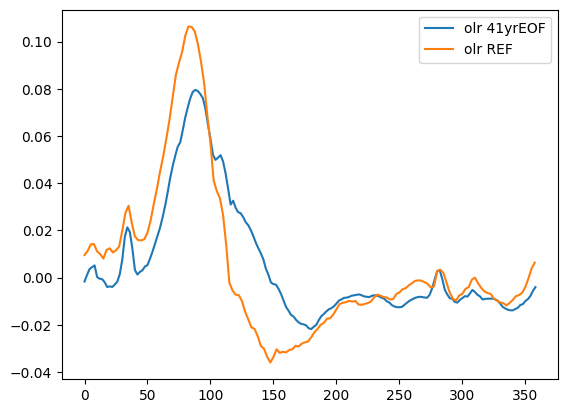

In [69]:
import matplotlib.pyplot as plt 
fn = '/global/homes/l/linyaoly/ERA5/reanalysis/WH04_EOFstruc.txt'
dswh = pd.read_csv(fn, skiprows=9, nrows=144*3, sep=' ', header=None, names=["x","EOF1","EOF2"])

ds = xr.open_dataset('/global/homes/l/linyaoly/ERA5/reanalysis/RMMeof_ERA5_6hr.nc')
EOF_RMM_field = ds['EOF']

plt.plot(np.arange(0,360,2), EOF_RMM_field[0:180,1], label='olr 41yrEOF')
plt.plot(np.arange(0,360,2.5),dswh.iloc[0:144,:].EOF2, label='olr REF')
plt.legend()


In [71]:
ds = xr.open_dataset('/global/homes/l/linyaoly/ERA5/reanalysis/RMM_ERA5_6hr.nc')
pc = ds['RMM']
pc.min()


<xarray.DataArray 'RMM' ()>
array(-4.02086067)

In [30]:
eigenvalue1 = solver.eigenvalues(neigs=2)

print(eigenvalue1)


<xarray.DataArray 'eigenvalues' (mode: 2)>
array([37717.637   ,   116.113884], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1
Attributes:
    long_name:  eigenvalues


In [31]:
# Change the Sign of EOF to be consistent with WH04
ieof1max, ieof2max = EOF_RMM_field[0:180,:].argmax(dim="lon")
lonmaxeof1 = EOF_RMM_field.lon[ieof1max]
lonmaxeof2 = EOF_RMM_field.lon[ieof2max]

if (lonmaxeof1 >= 100) & (lonmaxeof1 <= 180) :
    EOF_RMM_field[:,0] = - EOF_RMM_field[:,0]

if (lonmaxeof2 >= 120) & (lonmaxeof2 <= 220) :
    EOF_RMM_field[:,1] = - EOF_RMM_field[:,1]

# project the whole dataset onto the EOF during 1979-2014
PC_RMM_field = RMM_field.dot(EOF_RMM_field)
tmp = PC_RMM_field / np.sqrt(eigenvalue1)

PC_RMM_field = (tmp - tmp.mean(dim='time')) / tmp.std(dim='time')


In [32]:
PC_RMM_field

<xarray.DataArray (time: 15857, mode: 2)>
array([[-1.2973557 ,  1.9642425 ],
       [-0.8014958 ,  2.2088592 ],
       [-1.7089546 ,  2.310754  ],
       ...,
       [-2.0511336 , -0.29300082],
       [-2.3487358 , -0.37237293],
       [-2.344975  , -0.6127417 ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-05-31
  * mode     (mode) int64 0 1

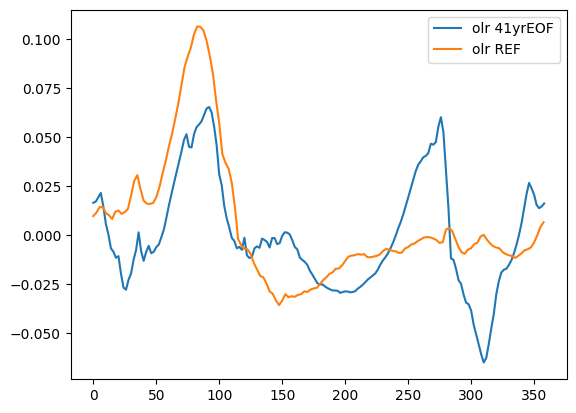

In [33]:
import matplotlib.pyplot as plt 
fn = '/global/homes/l/linyaoly/ERA5/reanalysis/WH04_EOFstruc.txt'
dswh = pd.read_csv(fn, skiprows=9, nrows=144*3, sep=' ', header=None, names=["x","EOF1","EOF2"])

plt.plot(np.arange(0,360,2), EOF_RMM_field[0:180,1], label='olr 41yrEOF')
plt.plot(np.arange(0,360,2.5),dswh.iloc[0:144,:].EOF2, label='olr REF')
plt.legend()


In [11]:
PC_RMM_field.min()

<xarray.DataArray ()>
array(-4.17835808)

In [37]:
varn = 'olr'
latsel = 90
latflg = 'GfltG'

# select the wanted time range and latitude range
ds0 = xr.open_dataset("/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".6hr.1978to2022.nc")
ds0['olr'][0,:,:]

<xarray.DataArray 'olr' (lat: 91, lon: 180)>
array([[-575740.6 , -575740.6 , -575740.6 , ..., -575740.6 , -575740.6 ,
        -575740.6 ],
       [-572303.4 , -569744.5 , -566975.56, ..., -584677.6 , -580438.25,
        -575988.9 ],
       [-606007.94, -605568.75, -605702.4 , ..., -607955.75, -606065.25,
        -606389.9 ],
       ...,
       [-670724.5 , -669807.94, -668891.3 , ..., -675288.5 , -673608.  ,
        -672118.56],
       [-672519.56, -672175.8 , -671373.8 , ..., -673512.56, -673092.44,
        -672691.44],
       [-639693.4 , -639693.4 , -639693.4 , ..., -639693.4 , -639693.4 ,
        -639693.4 ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
    time     datetime64[ns] 1978-01-01
Attributes:
    units:          J m**-2
    long_name:      Top net thermal radiation
    standard_name:  toa_outgoing_longwave_flux

In [1]:
import numpy as np 
import pandas as pd 
import xarray as xr 
import scipy.fft as fft 
import matplotlib.pyplot as plt 

# OLR
# remove 120-day running averages
varn = 'olr'
latsel = 90
latflg = 'GfltG'

# select the wanted time range and latitude range
ds0 = xr.open_dataset("/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".6hr.1978to2022.nc")
ds0 = ds0.sel(time=slice('1978-09-03', '2022-05-31'), lat=slice(latsel,-latsel))
ds0[varn] = - ds0[varn] / 3600   # convert the unit to W/m2
ds1 = ds0.sel(time=slice('1979-01-01', '2022-05-31'))

varn0 = ds0[varn]  # '1978-09-03', '2022-05-31'
varn1 = ds1[varn]  # '1979-01-01', '2022-05-31'

i = 0 
varnsel = varn0[i::4,:,:]  # select each day at 00:00/06:00/12:00/18:00
# print(varnsel)
fltu = varnsel.rolling(time=120, center=False).mean()
varnsel = varnsel.sel(time=slice('1979-01-01', '2022-05-31'))
varn1[i::4,:,:] = varnsel - fltu[119:-1,:,:].values

# print("removed 120-day running averages")
# print(varn)
# print(varnsel[0].time.dt.hour)
print("min: "+str(varn1[i::4,:,:].min()))
print("max: " + str(varn1[i::4,:,:].max()))
print(varn1[0,45,0])
print(varnsel[0,45,0])
print(fltu[119,45,0])

min: <xarray.DataArray 'olr' ()>
array(-226.35391235)
max: <xarray.DataArray 'olr' ()>
array(267.12213135)
<xarray.DataArray 'olr' ()>
array(9.277466, dtype=float32)
Coordinates:
    lon      float32 0.0
    lat      float32 0.0
    time     datetime64[ns] 1979-01-01
<xarray.DataArray 'olr' ()>
array(9.277466, dtype=float32)
Coordinates:
    lon      float32 0.0
    lat      float32 0.0
    time     datetime64[ns] 1979-01-01
<xarray.DataArray 'olr' ()>
array(274.3188, dtype=float32)
Coordinates:
    lon      float32 0.0
    lat      float32 0.0
    time     datetime64[ns] 1978-12-31


In [2]:
print(varn1[0,45,0])
print(varnsel[0,45,0])
print(fltu[119,45,0])

<xarray.DataArray 'olr' ()>
array(9.277466, dtype=float32)
Coordinates:
    lon      float32 0.0
    lat      float32 0.0
    time     datetime64[ns] 1979-01-01
<xarray.DataArray 'olr' ()>
array(9.277466, dtype=float32)
Coordinates:
    lon      float32 0.0
    lat      float32 0.0
    time     datetime64[ns] 1979-01-01
<xarray.DataArray 'olr' ()>
array(274.3188, dtype=float32)
Coordinates:
    lon      float32 0.0
    lat      float32 0.0
    time     datetime64[ns] 1978-12-31


In [7]:
import numpy as np 
import pandas as pd 
import xarray as xr 
import scipy.fft as fft 
import matplotlib.pyplot as plt 

# OLR
# remove 120-day running averages
varn = 'olr'
latsel = 90
latflg = 'GfltG'

# select the wanted time range and latitude range
ds0 = xr.open_dataset("/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".6hr.1978to2022.nc")
ds0 = ds0.sel(time=slice('1978-09-03', '2022-05-31'), lat=slice(latsel,-latsel))
ds0[varn] = - ds0[varn] / 3600   # convert the unit to W/m2
ds1 = ds0.sel(time=slice('1979-01-01', '2022-05-31'))
ds1 
# varn0 = ds0[varn]  # '1978-09-03', '2022-05-31'
# varn1 = ds1[varn]  # '1979-01-01', '2022-05-31'

# i = 0 
# varnsel = varn0[i::4,:,:]  # select each day at 00:00/06:00/12:00/18:00
# # print(varnsel)
# fltu = varnsel.rolling(time=120, center=False).mean()
# varnsel = varnsel.sel(time=slice('1979-01-01', '2022-05-31'))
# varnsel = varnsel - fltu[119:-1,:,:].values

# # print("removed 120-day running averages")
# # print(varn)
# # print(varnsel[0].time.dt.hour)
# print("min: "+str(varnsel.min()))
# print("max: " + str(varnsel.max()))
# # print(ds1[varn][0,45,0])
# # print(varnsel[0,45,0])
# # print(fltu[119,45,0])
# # print(varn1)

<xarray.Dataset>
Dimensions:  (lon: 180, lat: 91, time: 63428)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * time     (time) datetime64[ns] 1979-01-01 ... 2022-05-31T18:00:00
Data variables:
    olr      (time, lat, lon) float32 162.9 162.9 162.9 ... 133.7 133.7 133.7
Attributes:
    Conventions:  CF-1.6
    history:      2022-10-11 19:53:07 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [8]:
varn0 = ds0[varn]  # '1978-09-03', '2022-05-31'
varn1 = ds1[varn]  # '1979-01-01', '2022-05-31'

In [12]:
varn0

<xarray.DataArray 'olr' (time: 63908, lat: 91, lon: 180)>
array([[[226.67934 , 226.67934 , 226.67934 , ..., 226.67934 ,
         226.67934 , 226.67934 ],
        [225.82533 , 225.76698 , 225.6821  , ..., 226.74829 ,
         226.3929  , 226.04811 ],
        [221.7621  , 221.67725 , 221.67192 , ..., 222.15994 ,
         222.27133 , 222.06447 ],
        ...,
        [136.39735 , 136.16927 , 135.89343 , ..., 136.5724  ,
         136.6997  , 136.49284 ],
        [131.8249  , 131.76656 , 131.76125 , ..., 131.05577 ,
         131.37933 , 131.66577 ],
        [122.170784, 122.170784, 122.170784, ..., 122.170784,
         122.170784, 122.170784]],

       [[233.84038 , 233.84038 , 233.84038 , ..., 233.84038 ,
         233.84038 , 233.84038 ],
        [221.31123 , 220.72243 , 219.88432 , ..., 222.24481 ,
         221.92654 , 221.59767 ],
        [225.28427 , 225.11453 , 225.00314 , ..., 222.66917 ,
         223.62927 , 224.34538 ],
...
        [129.62886 , 129.25224 , 128.85442 , ..., 131.4695  ,
         130.77463 , 130.18053 ],
        [128.28152 , 128.3664  , 128.43005 , ..., 128.18074 ,
         128.14362 , 128.15422 ],
        [145.92416 , 145.92416 , 145.92416 , ..., 145.92416 ,
         145.92416 , 145.92416 ]],

       [[223.311   , 223.311   , 223.311   , ..., 223.311   ,
         223.311   , 223.311   ],
        [215.26413 , 215.88475 , 216.35686 , ..., 214.82916 ,
         214.88751 , 214.99892 ],
        [231.15633 , 231.11919 , 231.09796 , ..., 231.0343  ,
         231.10327 , 231.16693 ],
        ...,
        [130.35558 , 129.88878 , 129.41138 , ..., 132.5357  ,
         131.71883 , 131.01863 ],
        [126.69549 , 126.80158 , 126.85463 , ..., 126.923584,
         126.79097 , 126.67427 ],
        [133.72922 , 133.72922 , 133.72922 , ..., 133.72922 ,
         133.72922 , 133.72922 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * time     (time) datetime64[ns] 1978-09-03 ... 2022-05-31T18:00:00

In [16]:
varn1[i::4]

<xarray.DataArray 'olr' (time: 15857, lat: 91, lon: 180)>
array([[[162.88785 , 162.88785 , 162.88785 , ..., 162.88785 ,
         162.88785 , 162.88785 ],
        [164.05482 , 163.83736 , 163.69414 , ..., 164.25641 ,
         164.19275 , 164.12378 ],
        [170.62177 , 170.11253 , 169.57147 , ..., 171.01428 ,
         171.01428 , 170.77559 ],
        ...,
        [197.6321  , 197.55254 , 197.45174 , ..., 198.07236 ,
         197.92384 , 197.76471 ],
        [198.61873 , 198.55507 , 198.47021 , ..., 198.8097  ,
         198.72482 , 198.64525 ],
        [198.21028 , 198.21028 , 198.21028 , ..., 198.21028 ,
         198.21028 , 198.21028 ]],

       [[162.2407  , 162.2407  , 162.2407  , ..., 162.2407  ,
         162.2407  , 162.2407  ],
        [139.93544 , 140.02031 , 140.04683 , ..., 138.9435  ,
         139.25645 , 139.58534 ],
        [140.81067 , 140.44997 , 139.86647 , ..., 141.90869 ,
         141.72304 , 141.09181 ],
...
        [131.4642  , 131.27324 , 131.07698 , ..., 132.71606 ,
         132.22275 , 131.8143  ],
        [128.03221 , 128.05875 , 127.96326 , ..., 128.05344 ,
         128.00569 , 127.97386 ],
        [122.68531 , 122.68531 , 122.68531 , ..., 122.68531 ,
         122.68531 , 122.68531 ]],

       [[227.41136 , 227.41136 , 227.41136 , ..., 227.41136 ,
         227.41136 , 227.41136 ],
        [231.151   , 230.56223 , 230.04237 , ..., 230.38185 ,
         230.72665 , 231.0237  ],
        [231.42154 , 231.55415 , 231.62311 , ..., 231.82999 ,
         231.7398  , 231.56476 ],
        ...,
        [129.51216 , 129.16737 , 128.82788 , ..., 131.24141 ,
         130.59958 , 130.03731 ],
        [128.8438  , 128.79076 , 128.69527 , ..., 128.67935 ,
         128.7271  , 128.78545 ],
        [133.97853 , 133.97853 , 133.97853 , ..., 133.97853 ,
         133.97853 , 133.97853 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-05-31

In [13]:

i = 0 
varnsel = varn0[i::4,:,:]  # select each day at 00:00/06:00/12:00/18:00
# print(varnsel)
fltu = varnsel.rolling(time=120, center=False).mean()

fltu 
# varnsel = varnsel.sel(time=slice('1979-01-01', '2022-05-31'))
# varnsel = varnsel - fltu[119:-1,:,:].values

<xarray.DataArray 'olr' (time: 15977, lat: 91, lon: 180)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
...
        [144.90459, 144.64847, 144.45908, ..., 146.43266, 145.86186,
         145.35994],
        [145.34259, 145.28949, 145.20154, ..., 145.64745, 145.51544,
         145.39226],
        [144.66484, 144.66484, 144.66484, ..., 144.66484, 144.66484,
         144.66484]],

       [[185.57074, 185.57074, 185.57074, ..., 185.57074, 185.57074,
         185.57074],
        [186.92422, 186.80542, 186.7313 , ..., 187.20009, 187.10284,
         187.0024 ],
        [186.69759, 186.63959, 186.49803, ..., 187.31633, 187.1314 ,
         186.89378],
        ...,
        [144.5098 , 144.25235, 144.06137, ..., 146.04662, 145.47247,
         144.9679 ],
        [144.94748, 144.89388, 144.80516, ..., 145.25204, 145.11972,
         144.99638],
        [144.31248, 144.31248, 144.31248, ..., 144.31248, 144.31248,
         144.31248]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * time     (time) datetime64[ns] 1978-09-03 1978-09-04 ... 2022-05-31

In [19]:
fltu[119,45,:]

<xarray.DataArray 'olr' (lon: 180)>
array([274.3188 , 271.5173 , 267.31863, 260.0409 , 251.5415 , 243.75943,
       229.61832, 230.68262, 220.5912 , 214.2986 , 201.89499, 204.14214,
       207.95712, 209.48007, 207.66733, 227.07417, 236.642  , 223.0806 ,
       250.87651, 263.3308 , 274.13617, 280.3288 , 284.31662, 283.82205,
       282.1945 , 278.81985, 277.50092, 273.63943, 270.89984, 265.2323 ,
       264.2505 , 257.4541 , 251.4715 , 249.11153, 246.19452, 248.48947,
       245.9097 , 245.16263, 243.7509 , 239.94043, 233.1603 , 233.99905,
       234.69626, 228.78615, 225.05946, 219.03555, 210.69203, 211.31236,
       197.53006, 200.4546 , 219.47945, 216.17679, 207.85527, 214.07675,
       211.20381, 213.753  , 215.09694, 207.53073, 205.98912, 194.17569,
       216.0852 , 225.1302 , 228.29312, 216.70097, 223.39992, 218.32509,
       216.95741, 216.41888, 208.93666, 211.54434, 211.40773, 217.4588 ,
       220.512  , 218.45235, 214.90327, 218.53885, 219.53322, 231.43102,
       235.95938, 246.70815, 256.30692, 262.31268, 261.63663, 268.42963,
       268.7125 , 271.71307, 273.67053, 275.34933, 274.91663, 278.75873,
       283.61893, 288.5207 , 289.35358, 289.73187, 292.35074, 294.42355,
       296.27707, 298.01062, 298.67316, 299.0138 , 298.9514 , 298.88046,
       298.7379 , 298.08502, 298.918  , 298.1843 , 298.647  , 299.6372 ,
       299.58746, 300.0156 , 299.6297 , 299.95685, 299.4693 , 299.50992,
       298.8273 , 298.09232, 297.92413, 297.33972, 297.26263, 296.7469 ,
       296.04785, 294.87448, 294.0247 , 293.3331 , 292.58673, 291.58823,
       291.4442 , 290.9708 , 289.85535, 288.3995 , 288.20953, 288.24066,
       287.64255, 286.9097 , 286.51883, 285.4094 , 282.92633, 281.533  ,
       280.42758, 276.31506, 247.84857, 201.60567, 218.76195, 206.784  ,
       207.71344, 205.41585, 214.25084, 221.95183, 220.64447, 227.69736,
       228.20206, 238.70934, 236.64087, 249.15805, 255.20016, 258.1181 ,
       267.71863, 275.57916, 279.70316, 279.87448, 279.20306, 277.94974,
       278.53177, 274.39404, 278.04495, 278.77332, 280.93906, 281.17255,
       283.21594, 283.85037, 283.9974 , 286.01193, 285.78738, 287.03525,
       286.27264, 285.5982 , 284.252  , 282.84152, 281.04443, 278.74814],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    lat      float32 0.0
    time     datetime64[ns] 1978-12-31

In [17]:
varnsel = varnsel.sel(time=slice('1979-01-01', '2022-05-31'))
varnsel[0,45,:]
# varnsel = varnsel - fltu[119:-1,:,:].values

<xarray.DataArray 'olr' (lon: 180)>
array([283.59625, 282.3709 , 285.96204, 282.76874, 265.05185, 262.0177 ,
       254.97337, 264.21375, 264.10236, 259.48746, 226.30272, 197.97157,
       152.8518 , 241.31967, 263.9008 , 279.1458 , 288.23767, 290.1897 ,
       276.57843, 291.10205, 300.42203, 299.12244, 302.08234, 299.5574 ,
       293.33524, 270.1335 , 276.92322, 270.62152, 283.35754, 285.15045,
       279.24658, 287.2139 , 287.73904, 293.46255, 288.66202, 284.11078,
       281.48508, 281.8776 , 286.80545, 294.1256 , 293.81265, 291.19754,
       295.4305 , 294.18927, 286.92746, 251.94981, 198.34819, 230.03706,
       247.0803 , 221.55524, 225.44872, 267.69348, 249.64767, 190.68324,
       144.41771, 197.90793, 229.8408 , 191.8184 , 236.6093 , 169.68288,
       192.85278, 189.27757, 173.79384, 150.84143, 256.88297, 220.65347,
       212.83469, 237.20871, 277.947  , 271.762  , 270.2502 , 265.16855,
       272.21286, 260.80826, 274.027  , 198.99535, 277.9417 , 275.3637 ,
       274.22858, 269.68265, 229.32626, 249.29759, 220.72243, 192.44963,
       122.24504, 115.13175, 157.50381, 206.29428, 149.19704, 200.26842,
       184.59372, 240.09435, 265.6141 , 267.20016, 272.92368, 286.11057,
       250.61841, 274.32935, 289.3516 , 263.4393 , 294.86295, 288.5347 ,
       275.93658, 282.84833, 299.74832, 305.81134, 303.90704, 303.31296,
       301.2813 , 303.47208, 304.52237, 301.7322 , 297.44092, 296.25272,
       292.57138, 292.27438, 295.1971 , 295.25018, 292.47595, 288.27478,
       294.2211 , 293.5368 , 290.4072 , 291.22937, 290.74136, 282.6945 ,
       273.16238, 262.19803, 270.20248, 268.44672, 273.66098, 262.54282,
       250.72447, 239.96172, 262.7497 , 246.2051 , 262.83987, 283.86148,
       271.61346, 254.06099, 257.21716, 255.7266 , 262.10257, 256.59653,
       254.63387, 219.70398, 207.81667, 200.74582, 184.9173 , 181.77176,
       155.18576, 165.11041, 220.83913, 224.81749, 262.0177 , 268.5952 ,
       268.25043, 263.64084, 268.99304, 272.7168 , 271.396  , 234.53526,
       189.5534 , 211.0683 , 240.61417, 273.93683, 277.68707, 280.82733,
       282.4611 , 286.68875, 288.35437, 285.60666, 287.53217, 285.543  ,
       288.12097, 284.7102 , 284.2328 , 280.3393 , 287.04416, 285.28308],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    lat      float32 0.0
    time     datetime64[ns] 1979-01-01

In [20]:
varnsel1 = varnsel - fltu[119:-1,:,:].values
varnsel1 

<xarray.DataArray 'olr' (time: 15857, lat: 91, lon: 180)>
array([[[-19.840515 , -19.840515 , -19.840515 , ..., -19.840515 ,
         -19.840515 , -19.840515 ],
        [-19.799423 , -20.151154 , -20.434708 , ..., -19.269028 ,
         -19.433563 , -19.603455 ],
        [-12.360001 , -13.193909 , -13.963089 , ..., -11.462738 ,
         -11.630325 , -12.056152 ],
        ...,
        [ 42.69394  ,  42.903595 ,  43.09903  , ...,  41.702515 ,
          42.05522  ,  42.371872 ],
        [ 42.359528 ,  42.417526 ,  42.451553 , ...,  42.157913 ,
          42.212723 ,  42.26935  ],
        [ 42.19188  ,  42.19188  ,  42.19188  , ...,  42.19188  ,
          42.19188  ,  42.19188  ]],

       [[-19.956085 , -19.956085 , -19.956085 , ..., -19.956085 ,
         -19.956085 , -19.956085 ],
        [-43.404053 , -43.452133 , -43.565445 , ..., -44.061188 ,
         -43.851547 , -43.62587  ],
        [-41.744934 , -42.42679  , -43.233932 , ..., -40.14212  ,
         -40.49443  , -41.31253  ],
...
        [-13.820923 , -13.754974 , -13.76149  , ..., -14.0952   ,
         -14.018509 , -13.925751 ],
        [-17.740646 , -17.659164 , -17.665741 , ..., -18.027832 ,
         -17.942719 , -17.850357 ],
        [-22.435173 , -22.435173 , -22.435173 , ..., -22.435173 ,
         -22.435173 , -22.435173 ]],

       [[ 42.389236 ,  42.389236 ,  42.389236 , ...,  42.389236 ,
          42.389236 ,  42.389236 ],
        [ 44.72946  ,  44.26024  ,  43.81505  , ...,  43.67427  ,
          44.120316 ,  44.52156  ],
        [ 45.221466 ,  45.42038  ,  45.639923 , ...,  44.98941  ,
          45.09111  ,  45.160767 ],
        ...,
        [-15.392426 , -15.481094 , -15.631195 , ..., -15.191254 ,
         -15.262283 , -15.322632 ],
        [-16.498795 , -16.498734 , -16.506271 , ..., -16.968094 ,
         -16.788345 , -16.606812 ],
        [-10.68631  , -10.68631  , -10.68631  , ..., -10.68631  ,
         -10.68631  , -10.68631  ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * lat      (lat) float32 90.0 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0 -90.0
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2022-05-31

In [21]:
varnsel1.max()

<xarray.DataArray 'olr' ()>
array(267.12213135)

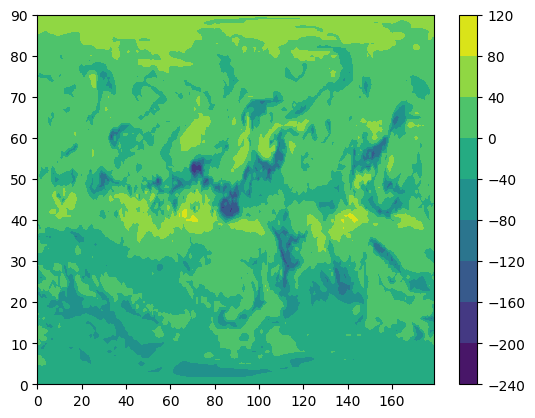

In [25]:
tmp = varnsel1[0,:,:]
plt.contourf(tmp)
plt.colorbar()

In [32]:
# calculate anomalies of a given field 
import numpy as np 
import pandas as pd 
import xarray as xr 
import scipy.fft as fft 
import matplotlib.pyplot as plt 

# OLR
# remove 120-day running averages
varn = 'olr'
latsel = 90
latflg = 'GfltG'

# select the wanted time range and latitude range
ds0 = xr.open_dataset("/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".6hr.1978to2022.nc")
ds0 = ds0.sel(time=slice('1978-09-03', '2022-05-31'), lat=slice(latsel,-latsel))
ds0[varn] = - ds0[varn] / 3600   # convert the unit to W/m2
ds1 = ds0.sel(time=slice('1979-01-01', '2022-05-31'))

varn0 = ds0[varn]  # '1978-09-03', '2022-05-31'
varn1 = ds1[varn]  # '1979-01-01', '2022-05-31'

del ds0

for i in [0,1,2,3]:
    varnsel = varn0[i::4,:,:]  # select each day at 00:00/06:00/12:00/18:00

    fltu = varnsel.rolling(time=120, center=False).mean()
    varnsel = varnsel.sel(time=slice('1979-01-01', '2022-05-31'))
    varnseltmp = varnsel.values - fltu[119:-1,:,:].values
    ds1[varn][i::4,:,:] = varnseltmp

    # print("removed 120-day running averages")
    # print(varn)
    # print(varnsel[0].time.dt.hour)
    print("min: "+str(varnseltmp.min()))
    print("max: " + str(varnseltmp.max()))
    del varnsel
    del fltu

print("min: "+str(ds1[varn].min()))
print("max: " + str(ds1[varn].max()))

min: -226.35391
max: 267.12213
min: -245.78333
max: 267.19977
min: -242.7999
max: 268.8481
min: -275.4569
max: 263.78015
min: <xarray.DataArray 'olr' ()>
array(-275.45690918)
max: <xarray.DataArray 'olr' ()>
array(268.84811401)


In [36]:
# remove the first 3 Fourier harmonics in 
# which is the smoothed climatology daily average during year 1979-2014
varnfrt = varn1.sel(time=slice('1979-01-01','2014-12-31'))

for i in [0]:
    varnsel = varnfrt[i::4,:,:]  # select each day at 00:00/06:00/12:00/18:00
    varnseldoy = varnsel.groupby("time.dayofyear").mean()
    climvarn = varnseldoy.values
    print("climvarn min: "+str(climvarn.min()))
    print("climvarn max: " + str(climvarn.max()))

    climvarnfft = fft.rfftn(climvarn, axes=0)

    climvarnfft[3:,:,:] = 0.0
    smclimvarn = fft.irfftn(climvarnfft, axes=0)
    # del climvarn
    # del climvarnfft

    varnseldoy.values = smclimvarn
    print("sm min: "+str(smclimvarn.min()))
    print("sm max: " + str(smclimvarn.max()))
    del smclimvarn
    x = ds1[varn][i::4,:,:].groupby("time.dayofyear") - varnseldoy
    del varnseldoy
    ds1[varn][i::4,:,:] = x
    del x 
    del varnsel
    

climvarn min: -65.18206
climvarn max: 42.715843
sm min: -9.2397175e-07
sm max: 9.4445744e-07


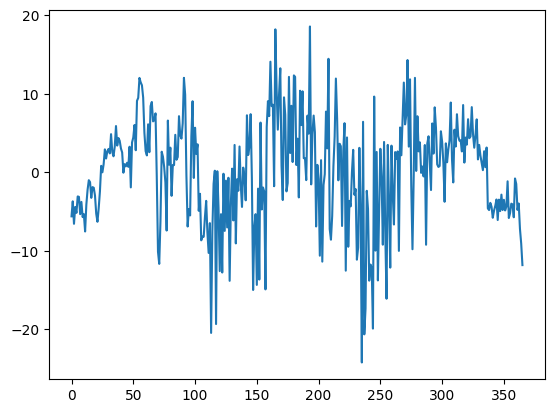

In [45]:
plt.plot(climvarn[:,39,0])


In [62]:
climvarnfft = fft.rfftn(climvarn[:,45,0], axes=0)
climvarnfft[8:] = 0.0
smclimvarn = fft.irfftn(climvarnfft, axes=0)

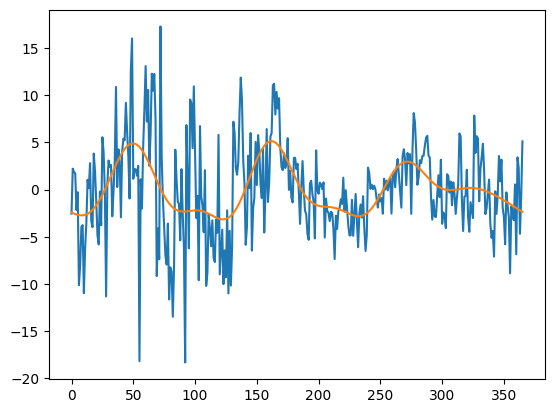

In [63]:
plt.plot(climvarn[:,45,0])
plt.plot(smclimvarn)

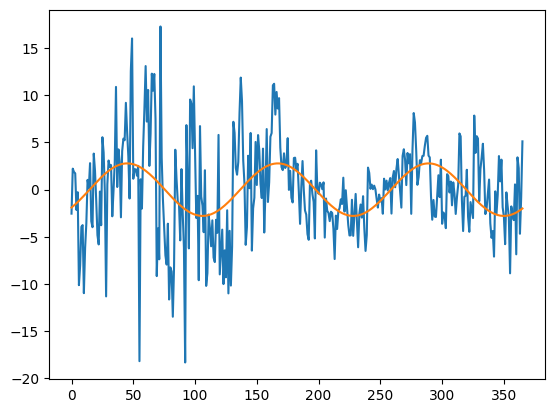

In [57]:
plt.plot(climvarn[:,45,0])
plt.plot(smclimvarn)

In [64]:
# calculate anomalies of a given field 
import numpy as np 
import pandas as pd 
import xarray as xr 
import scipy.fft as fft 
import matplotlib.pyplot as plt 

# OLR
# remove 120-day running averages
varn = 'olr'
latsel = 90
latflg = 'GfltG'

# select the wanted time range and latitude range
ds1 = xr.open_dataset("/pscratch/sd/l/linyaoly/ERA5/reanalysis/ERA5."+varn+".6hr.1978to2022.nc")
ds1 = ds1.sel(time=slice('1978-09-03', '2022-05-31'), lat=slice(latsel,-latsel))

fltu = ds1[varn].rolling(time=120*4, center=False).mean()
ds1 = ds1.sel(time=slice('1979-01-01', '2022-05-31'))
ds1[varn] = ds1[varn] - fltu[120*4-1:-1,:,:].values
ds1[varn] = - ds1[varn] / 3600   # convert the unit to W/m2
print("removed 120-day running averages")
print(varn)
print("min: "+str(ds1[varn].min()))
print("max: " + str(ds1[varn].max()))

# remove the first 3 Fourier harmonics in 
# which is the smoothed climatology daily average during year 1979-2014
dstmp = ds1.sel(time=slice('1979-01-01','2014-12-31'))
ds2 = dstmp.groupby("time.dayofyear").mean()
del dstmp
climvarn = ds2[varn].values
climvarnfft = fft.rfftn(climvarn, axes=0)
climvarnfft[3:,:,:] = 0.0
smclimvarn = fft.irfftn(climvarnfft, axes=0)



removed 120-day running averages
olr
min: <xarray.DataArray 'olr' ()>
array(-237.96260071)
max: <xarray.DataArray 'olr' ()>
array(268.84796143)


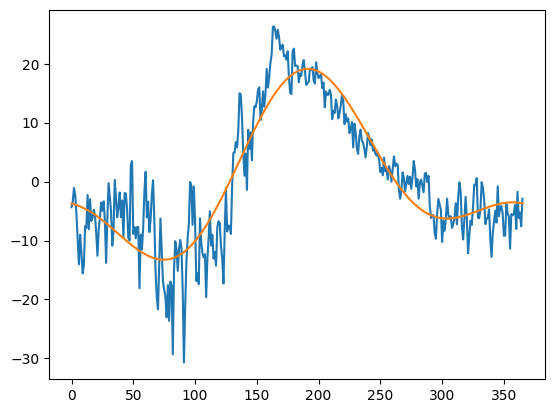

In [65]:
plt.plot(climvarn[:,45,0])
plt.plot(smclimvarn[:,45,0])

In [66]:
ds2[varn].values = smclimvarn
del smclimvarn
x = ds1[varn].groupby("time.dayofyear") - ds2[varn]
del ds2
ds1[varn].values = x.values

print(x.max())
print(x.min())

<xarray.DataArray 'olr' ()>
array(273.88751221)
<xarray.DataArray 'olr' ()>
array(-257.64608765)


In [67]:
x 

<xarray.DataArray 'olr' (time: 63428, lat: 91, lon: 180)>
array([[[-7.20984840e+00, -7.20984840e+00, -7.20984840e+00, ...,
         -7.20984840e+00, -7.20984840e+00, -7.20984840e+00],
        [-5.68709087e+00, -5.96818066e+00, -6.17918491e+00, ...,
         -5.36551952e+00, -5.45689774e+00, -5.55185890e+00],
        [ 4.88084793e-01, -2.98068047e-01, -1.03959084e+00, ...,
          1.40354538e+00,  1.22036648e+00,  8.07851791e-01],
        ...,
        [ 1.00382557e+01,  1.01941280e+01,  1.03370609e+01, ...,
          9.40057373e+00,  9.63327789e+00,  9.83009148e+00],
        [ 1.10807934e+01,  1.11316757e+01,  1.11648407e+01, ...,
          1.09564991e+01,  1.09790001e+01,  1.10093231e+01],
        [ 1.25689125e+01,  1.25689125e+01,  1.25689125e+01, ...,
          1.25689125e+01,  1.25689125e+01,  1.25689125e+01]],

       [[-3.59279289e+01, -3.59279289e+01, -3.59279289e+01, ...,
         -3.59279289e+01, -3.59279289e+01, -3.59279289e+01],
        [-1.83209457e+01, -1.79758034e+01, -1.74493408e+01, ...,
         -1.61466293e+01, -1.68485985e+01, -1.75859909e+01],
        [-6.18450260e+00, -6.43931770e+00, -6.73412228e+00, ...,
         -4.83404160e+00, -5.22388649e+00, -5.70527267e+00],
...
          2.51181221e+00,  2.36554432e+00,  2.25651360e+00],
        [ 3.31972122e-01,  4.65900421e-01,  6.32953644e-01, ...,
         -4.66537476e-02,  3.09276581e-02,  1.47075653e-01],
        [ 1.82973995e+01,  1.82973995e+01,  1.82973995e+01, ...,
          1.82973995e+01,  1.82973995e+01,  1.82973995e+01]],

       [[ 7.04854202e+00,  7.04854202e+00,  7.04854202e+00, ...,
          7.04854202e+00,  7.04854202e+00,  7.04854202e+00],
        [-1.21059418e+00, -5.54136276e-01, -3.66630554e-02, ...,
         -1.58592796e+00, -1.55578804e+00, -1.47010612e+00],
        [ 1.43209972e+01,  1.43454113e+01,  1.43803005e+01, ...,
          1.35967522e+01,  1.38813496e+01,  1.41438026e+01],
        ...,
        [ 2.97019863e+00,  2.75461006e+00,  2.48798943e+00, ...,
          3.68502426e+00,  3.41746330e+00,  3.20297146e+00],
        [-1.14842796e+00, -9.93785858e-01, -8.37957382e-01, ...,
         -1.19682693e+00, -1.21510506e+00, -1.22671890e+00],
        [ 6.15750408e+00,  6.15750408e+00,  6.15750408e+00, ...,
          6.15750408e+00,  6.15750408e+00,  6.15750408e+00]]],
      dtype=float32)
Coordinates:
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * lat        (lat) float32 90.0 88.0 86.0 84.0 ... -84.0 -86.0 -88.0 -90.0
  * time       (time) datetime64[ns] 1979-01-01 ... 2022-05-31T18:00:00
    dayofyear  (time) int64 1 1 1 1 2 2 2 2 ... 150 150 150 150 151 151 151 151